In [1]:
import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('datasets/AB_NYC_2019.csv')

#### Link to dataset: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [2]:
df.dropna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### How many Airbnbs are there in each major neighbourhood group?

In [5]:
print("Number of Airbnbs in each neighborhood")
print(df['neighbourhood_group'].value_counts())

Number of Airbnbs in each neighborhood
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


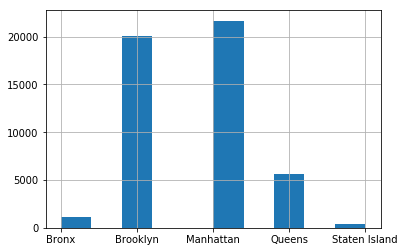

In [6]:
df['neighbourhood_group'].hist()
plt.show()

In [7]:
print("Percentage of Airbnbs in each neighbourhood in comparison to all of New York")
print(round(df['neighbourhood_group'].value_counts(normalize=True)*100, 3))

Percentage of Airbnbs in each neighborhood in comparison to all of New York
Manhattan        44.301
Brooklyn         41.117
Queens           11.588
Bronx             2.231
Staten Island     0.763
Name: neighbourhood_group, dtype: float64


#### As shown here, Manhattan and Brooklyn are by far the most popular neighbourhood groups to host an Airbnb in NYC

### What neighborhood groups have the highest average Airbnb price?

In [8]:
for area in df['neighbourhood_group'].unique():
    print(area + " " + str(df[df['neighbourhood_group'] == area]['price'].mean()) +" STD DEV: " + str(df[df['neighbourhood_group'] == area]['price'].std()))

Brooklyn 124.38320732192598 STD DEV: 186.87353781366113
Manhattan 196.8758136743456 STD DEV: 291.38318274158297
Queens 99.51764913519237 STD DEV: 167.10215506344343
Staten Island 114.81233243967829 STD DEV: 277.62040332462215
Bronx 87.4967919340055 STD DEV: 106.70934861314652


Neighbourhood: Brooklyn


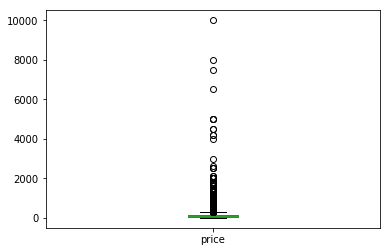

Neighbourhood: Manhattan


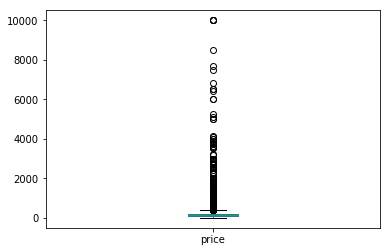

Neighbourhood: Queens


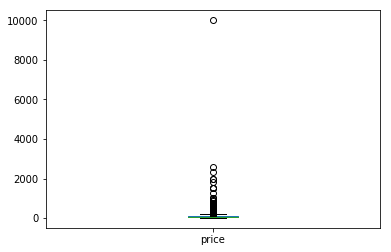

Neighbourhood: Staten Island


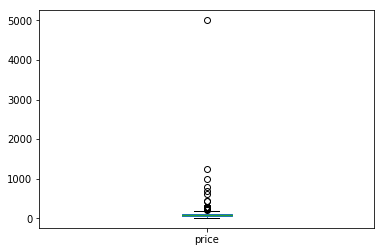

Neighbourhood: Bronx


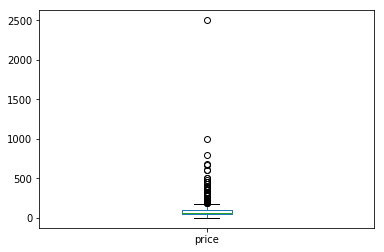

In [9]:
for area in df['neighbourhood_group'].unique():
    print("Neighbourhood: " + area)
    df[df['neighbourhood_group'] == area]['price'].plot.box()
    plt.show()

#### On average, Manhattan and Brooklyn have the highest price per night as well as the most Airbnbs

#### Along with having the two highest average prices, Manhattan and Brooklyn are also by far the most popular locations to host an Airbnb

### Since Manhattan is so popular, let's look more into the smaller neighborhoods it contains

In [10]:
Manh_neigh_price = list()
for area in df[df['neighbourhood_group'] == 'Manhattan']['neighbourhood'].unique():
    print(area + ": " + str(round(df[df['neighbourhood_group'] == 'Manhattan'][df['neighbourhood'] == area]['price'].mean(),2)))
    Manh_neigh_price.append((area, round(df[df['neighbourhood_group'] == 'Manhattan'][df['neighbourhood'] == area]['price'].mean(),2)))

Midtown: 282.72
Harlem: 118.97
East Harlem: 133.2
Murray Hill: 220.96
Hell's Kitchen: 204.79
Upper West Side: 210.92
Chinatown: 161.5
West Village: 267.68
Chelsea: 249.74
Inwood: 88.9
East Village: 186.08
Lower East Side: 186.31
Kips Bay: 202.41
SoHo: 287.1
Upper East Side: 188.95
Washington Heights: 89.61
Financial District: 225.49
Morningside Heights: 114.78
NoHo: 295.72
Flatiron District: 341.93
Roosevelt Island: 113.26
Greenwich Village: 263.41
Little Italy: 222.07
Two Bridges: 127.07
Nolita: 230.14
Gramercy: 222.75
Theater District: 248.01
Tribeca: 490.64
Battery Park City: 367.56
Civic Center: 191.94
Stuyvesant Town: 169.11
Marble Hill: 89.17


In [11]:
Manh_neigh_price.sort(key = lambda x: x[1], reverse = True)
Manh_neigh_price[:5]

[('Tribeca', 490.64),
 ('Battery Park City', 367.56),
 ('Flatiron District', 341.93),
 ('NoHo', 295.72),
 ('SoHo', 287.1)]

#### Five most expensive areas in New York for Airbnbs

In [13]:
NY_neigh_price = list()
for area in df['neighbourhood'].unique():
    print(area + ": " + str(round(df[df['neighbourhood'] == area]['price'].mean(),2)))
    NY_neigh_price.append((area, round(df[df['neighbourhood'] == area]['price'].mean(),2)))

Kensington: 92.89
Midtown: 282.72
Harlem: 118.97
Clinton Hill: 181.89
East Harlem: 133.2
Murray Hill: 220.96
Bedford-Stuyvesant: 107.68
Hell's Kitchen: 204.79
Upper West Side: 210.92
Chinatown: 161.5
South Slope: 146.73
West Village: 267.68
Williamsburg: 143.8
Fort Greene: 151.37
Chelsea: 249.74
Crown Heights: 112.48
Park Slope: 176.31
Windsor Terrace: 138.99
Inwood: 88.9
East Village: 186.08
Greenpoint: 144.82
Bushwick: 84.8
Flatbush: 92.21
Lower East Side: 186.31
Prospect-Lefferts Gardens: 110.4
Long Island City: 127.47
Kips Bay: 202.41
SoHo: 287.1
Upper East Side: 188.95
Prospect Heights: 173.37
Washington Heights: 89.61
Woodside: 85.1
Brooklyn Heights: 209.06
Carroll Gardens: 175.91
Gowanus: 158.8
Flatlands: 126.43
Cobble Hill: 211.93
Flushing: 93.51
Boerum Hill: 176.14
Sunnyside: 84.87
DUMBO: 196.31
St. George: 118.15
Highbridge: 71.11
Financial District: 225.49
Ridgewood: 77.18
Morningside Heights: 114.78
Jamaica: 95.77
Middle Village: 109.58
NoHo: 295.72
Ditmars Steinway: 95.03


In [14]:
NY_neigh_price.sort(key = lambda x: x[1], reverse = True)
NY_neigh_price[:5]

[('Fort Wadsworth', 800.0),
 ('Woodrow', 700.0),
 ('Tribeca', 490.64),
 ('Sea Gate', 487.86),
 ('Riverdale', 442.09)]

#### Tribeca is the only neighourhood in Manhattan that is also in the top five most expensive Airbnbs in NYC

### Now lets compare different types of room offerings

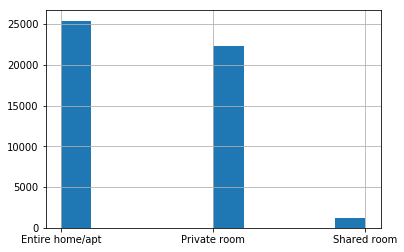

In [15]:
df['room_type'].hist()
plt.show()

In [16]:
for room_type in df['room_type'].unique():
    print(str(room_type) + " : " + str(round(df[df['room_type'] == room_type]['price'].mean(), 2)))

Private room : 89.78
Entire home/apt : 211.79
Shared room : 70.13


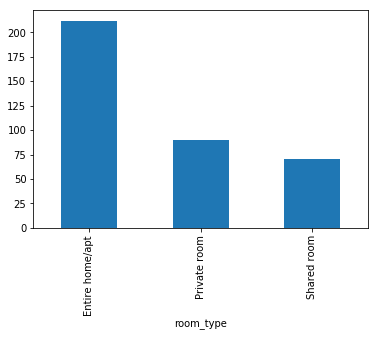

In [17]:
df.groupby('room_type')['price'].mean().plot(kind='bar')
plt.show()

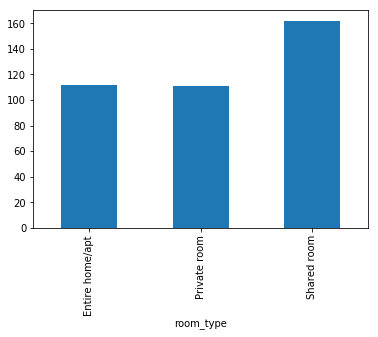

In [18]:
df.groupby('room_type')['availability_365'].mean().plot(kind='bar')
plt.show()

#### From here you can see even though shared rooms are the cheapest with the most availability, other housing options are much more popular

### Which neighborhoods have the highest number of reviews per month?

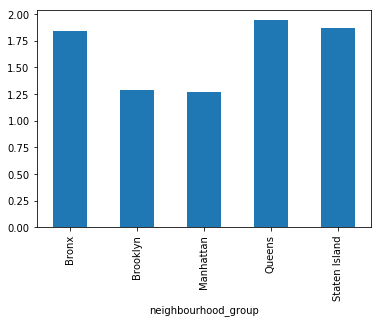

In [20]:
df.groupby('neighbourhood_group')['reviews_per_month'].mean().plot(kind='bar')
plt.show()

#### Is there a correlation between price and number of reviews per month?

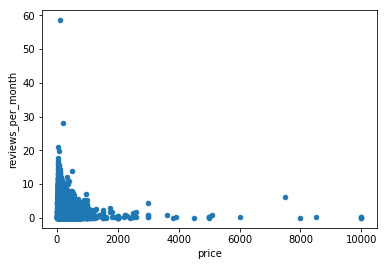

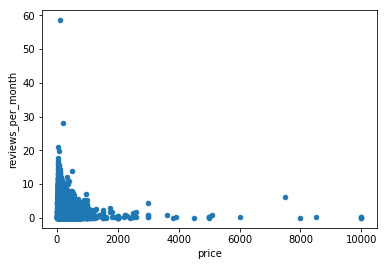

In [24]:
df.plot.scatter(x='price', y='reviews_per_month')
plt.show()

In [28]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


#### From here, you can see price and number of reviews per month have nearly no correlation(-0.047954)

#### And from this matrix of correlations shows that price does not correlate with anything else in the dataset. It could correlate with things like reviews, but those are not provided.

### How does the number of listings each host has correspond to the neighourhood

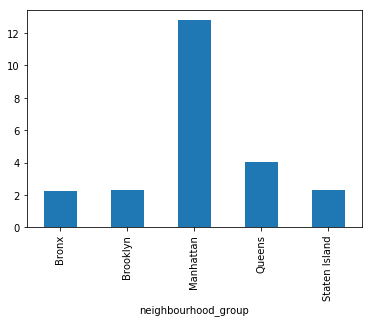

In [21]:
df.groupby('neighbourhood_group')['calculated_host_listings_count'].mean().plot(kind='bar')
plt.show()

## Data shortcomings

#### Data set did not include ratings of individual rentals or hosts, only number of ratings.

#### No seasonal data provided, so could not see when the best time to visit NYC is